# Loan Application Prediction

In the given project the dataset contains information like loan_id, gender, marital status,Self_Employed or not, ApplicantIncome,CoApplicant Income,Loan Amount,Loan Teram,Area of Property  etc.., based on which the task is to predict if the Loan application will be approved

This is a classification problem
Let's import the datset and analysze

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import statsmodels.api as k
from sklearn.preprocessing import LabelEncoder, PowerTransformer,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(614, 13)

The dataset has 614 rows and 13 columns 

No duplicates found

In [4]:
# looking at info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


The data has both continuous and categorical data

There are also null values present in the data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Data is randomly distributed with missing values, outliers and could be skewed
Let's fix the dataset

In [6]:
# checking for missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset has null values which need to be imputed 
Data imputation will be done in futhur steps

The dataset has both numerical and categorical data and null values

In [7]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Dropping loan id fromthe dataset as it is unique for every applicant and plays no role in our analysis

In [8]:
data= data.drop(columns=['Loan_ID'])
data.shape

(614, 12)

In [9]:
#Imputing missing values:
# Simple Imputer
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data.Gender=imputer.fit_transform(data['Gender'].values.reshape(-1,1))[:,0]
data.Married=imputer.fit_transform(data['Married'].values.reshape(-1,1))[:,0]
data.Dependents=imputer.fit_transform(data['Dependents'].values.reshape(-1,1))[:,0]
data.Self_Employed=imputer.fit_transform(data['Self_Employed'].values.reshape(-1,1))[:,0]
data.Credit_History=imputer.fit_transform(data['Credit_History'].values.reshape(-1,1))[:,0]
data.Loan_Amount_Term=imputer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
data.LoanAmount=imputer.fit_transform(data['LoanAmount'].values.reshape(-1,1))[:,0]




In [11]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


All missing values have been imputed

There are no missing values in the dataset

# Data Visualization

Visulizing the data take a closer look at the variables and check for patterns and strength of their relationships 

In [13]:
#Dividing the data into numerical and categorical data
n_data = data [['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
c_data = data.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

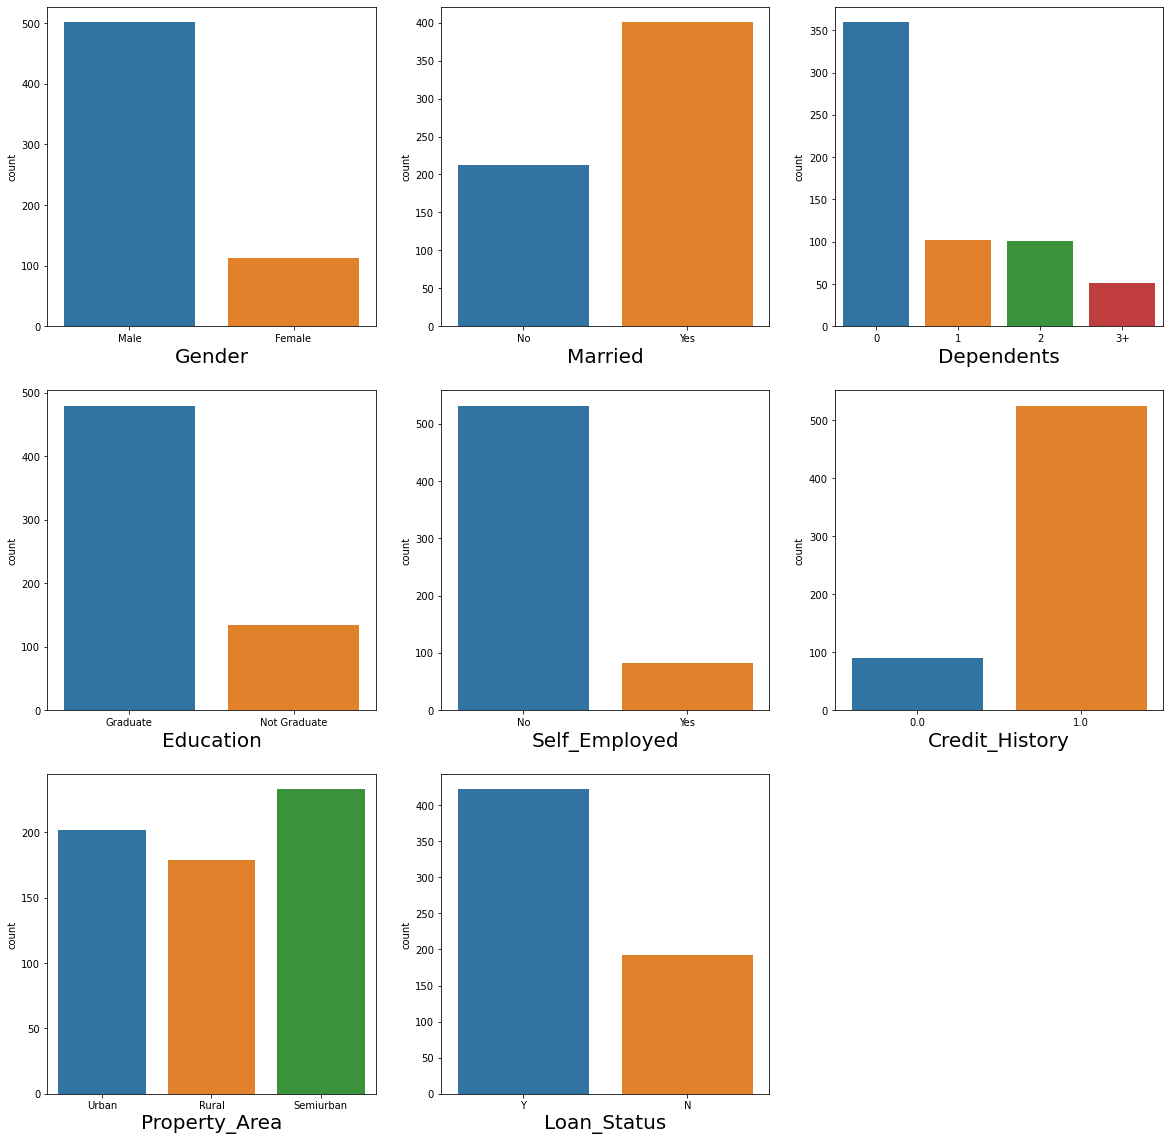

In [14]:
#Plotting count plots for categorical data

plt.figure(figsize=(20,20))
plotnumber = 1
for column in c_data:
    if plotnumber <=8:
        ax= plt.subplot(3,3,plotnumber)
        sns.countplot(data=c_data,x=c_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show

Interpreting the graphs

Gender: There are more male applicants than female applicants

Married: Majority of the applicants are married

Dependents: Majority of the applicants have no dependants, some have 1 or 2 dependents and very few have more than 3      dependents 

Education: Majority of the applicants are Graduates

Self_Employed: Moajority of the applicants are not self_employed

Credit_History: Most of the Applicants have a Credit History

Property_Area: The properties are spread across Urban Rural and Semiurban

Loan Status: This column is the label or target of the data set. Approved loan applications are more than unapproved applications which implies the dataset is imbalanced


From the given the features Applicant income, Credit history and Loan Amount could have a higher impact on the  Label prediction

Let's Visualize and look for patterns

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

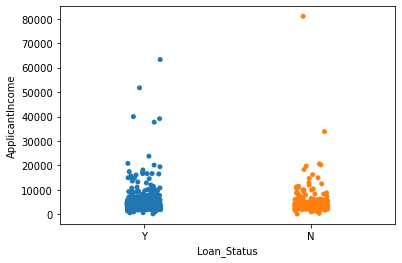

In [15]:
sns.stripplot(x='Loan_Status', y='ApplicantIncome', data=data)

Obervations:
People who apply for a loan have an average income of 5000 to 20000
Applicants with income more than 10000 have a higher chance of loan approval
Looks like Loan approval depends on the income of the applicant

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

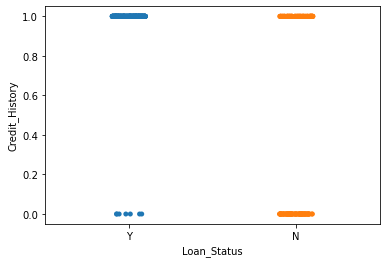

In [16]:
sns.stripplot(x='Loan_Status', y='Credit_History', data=data)

Observations: Applicants with credit history are more likely to get a loan approval than the ones without credit history

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

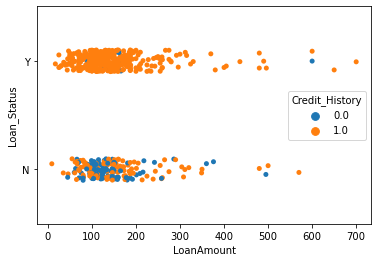

In [17]:
sns.stripplot(x='LoanAmount', y='Loan_Status',hue='Credit_History', data=data)

Observation: Loan amount lies between 50 to 250 and applicants with a credit history are mostly approved for the loan

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

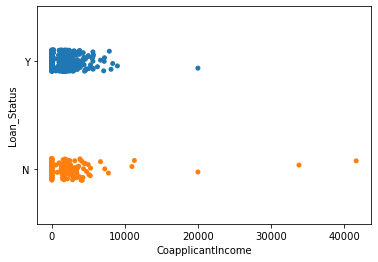

In [18]:
sns.stripplot(x='CoapplicantIncome', y='Loan_Status', data=data)

Observation: Having coapplicant income has a positive effect on the label

<function matplotlib.pyplot.show(close=None, block=None)>

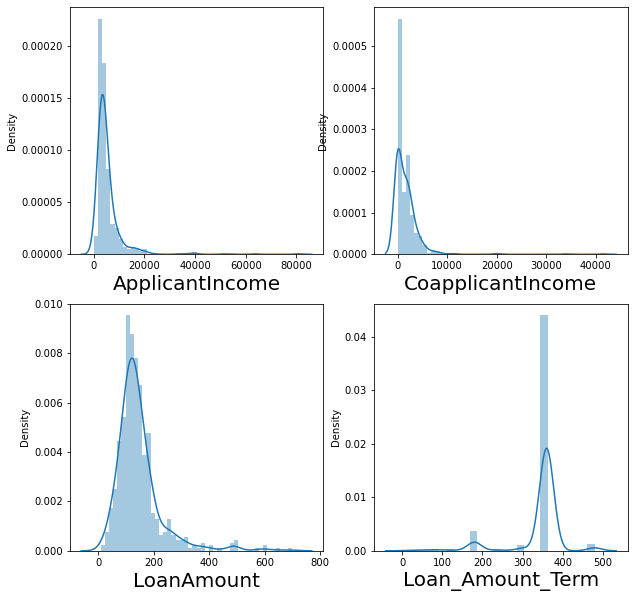

In [19]:
#Analysing numerical data
plt.figure(figsize=(10,10))
plotnumber = 1
for column in n_data:
    if plotnumber <=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

Numerical columns look good but there are outliers and skewness in the data 

In [20]:
#Lets check for skewness
n_data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
dtype: float64

Above columns are highly skewed and have ouliers
let's find the outliers and try to correct the skewness

Encoding the categorical data

In [21]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [22]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


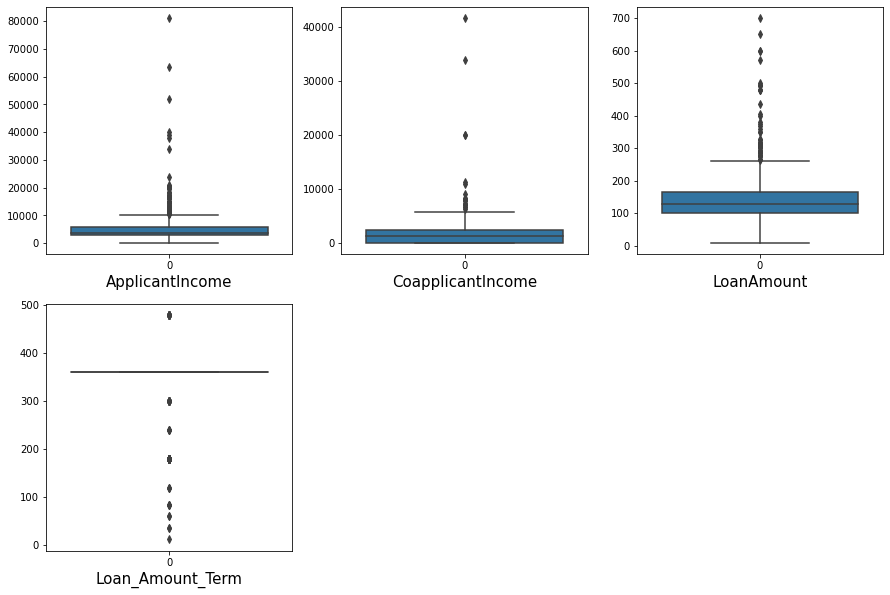

In [23]:
# Visualising outliers using box plot
# Checking for outliers using boxplot
plt.figure(figsize=(15,10))
graph =1
for column in n_data:
    if graph <=5:
        plt.subplot(2,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From the above graphs we observe the presence of outliers in all the columns

Let's find the outliers using z-score

In [24]:
features= n_data
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [25]:
new_data=data.drop(outliers[0],axis=0)
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [26]:
data_loss=((614-577)/614)*100
data_loss

6.026058631921824

In [27]:
new_data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Deleting the outliers will give a data loss of 6.02%

Also deleting the outliers reduced the skewness of the data

Hence deleting the outliers 

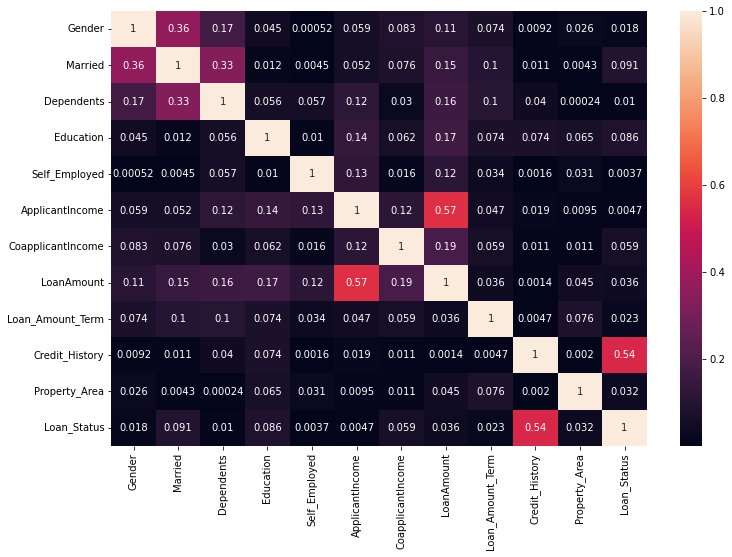

In [28]:
## Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

The heatmap looks good 

We observe Laon_Amount and Applicant income have strong relation will check for mutlicollinearity in futhur steps

It is also observed Credit histroy has the strongest relation with Loan_status

 Using Power Transformer to deal with skewness and then calculating vifs to check for  multicollinearity  

In [29]:
#Dividing data into features and label

X = data.drop(columns=['Loan_Status'])
Y= data['Loan_Status']

In [30]:

pt = PowerTransformer()

X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.175540,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.175540,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.175540,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.175540,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.175540,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.175540,0.411733,-1.350003
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.312879,0.411733,-1.350003
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.175540,0.411733,1.193567
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.175540,0.411733,1.193567


In [31]:
#checking for skewness
X_scaled.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.158267
dtype: float64

Skewness is under control

Observe that skewness for all numerical data is less than +/- 0.5

In [32]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,1.205037,Gender
1,1.415530,Married
2,1.192891,Dependents
3,1.064851,Education
4,1.043745,Self_Employed
5,1.846985,ApplicantIncome
6,1.545135,CoapplicantIncome
7,1.593439,LoanAmount
8,1.046803,Loan_Amount_Term
9,1.008268,Credit_History


Since vif is less than 10 data looks good

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

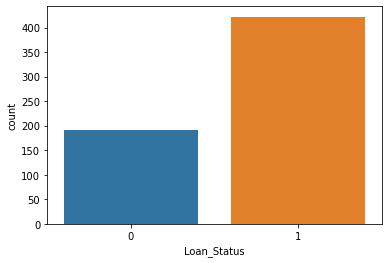

In [33]:
sns.countplot(Y)

Our target or label is not balanced

In [34]:
# Balancing the target column "loan_status" using SMOTE on training data
from imblearn.over_sampling import SMOTE

In [35]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 285)

In [36]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

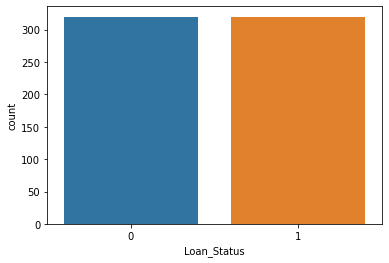

In [37]:
sns.countplot(y_train_rs)
plt.show()

The target column of training data is balanced

In [38]:
#traintestsplit
lg = LogisticRegression()
for i in range(100,500):
    x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  110 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 81.16883116883116

-----------------------------------------

At random state  112 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  117 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 81.16883116883116

-----------------------------------------

At random state  128 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  131 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  137 the model performs well
Acuraccy of training model : 81.3043478260869

At random state  417 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  418 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 81.16883116883116

-----------------------------------------

At random state  421 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  427 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  434 the model performs well
Acuraccy of training model : 81.30434782608695
Accuracy of testing model : 80.51948051948052

-----------------------------------------

At random state  437 the model performs well
Acuraccy of training model : 81.3043478260869

Selecting 250 as random state

In [39]:
#traintestsplit
x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 250)

In [40]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    auc_score = roc_auc_score(y_test,pred_test)
    
    print (algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of test data :\n ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    
    # Calculate ROC curve
    fpr, tpr, xg1 = roc_curve(y_test, pred_test)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print ("\nAUC score: ",auc_score)
    print ("\n -------------------------------------------------------------\n")

LogisticRegression()
Acuraccy of training model : 0.808695652173913
Accuracy of testing model : 0.8051948051948052
Classification report of test data :
                precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.81      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.80      0.69      0.71       154
weighted avg       0.80      0.81      0.78       154

Confusion Matrix 
 [[ 18  25]
 [  5 106]]


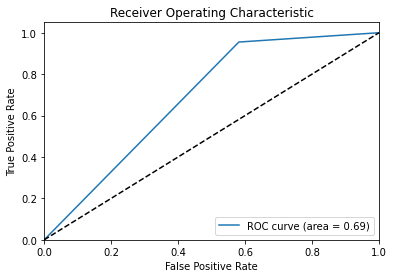


AUC score:  0.6867798030588728

 -------------------------------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.8130434782608695
Accuracy of testing model : 0.7662337662337663
Classification report of test data :
                precision    recall  f1-score   support

           0       0.62      0.42      0.50        43
           1       0.80      0.90      0.85       111

    accuracy                           0.77       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.75      0.77      0.75       154

Confusion Matrix 
 [[ 18  25]
 [ 11 100]]


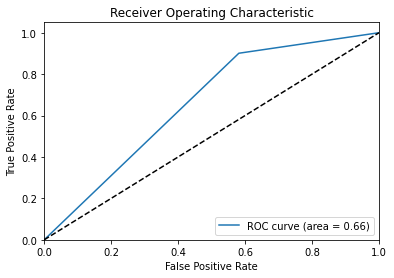


AUC score:  0.6597527760318458

 -------------------------------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.7142857142857143
Classification report of test data :
                precision    recall  f1-score   support

           0       0.49      0.63      0.55        43
           1       0.84      0.75      0.79       111

    accuracy                           0.71       154
   macro avg       0.66      0.69      0.67       154
weighted avg       0.74      0.71      0.72       154

Confusion Matrix 
 [[27 16]
 [28 83]]


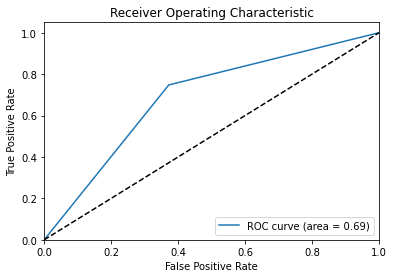


AUC score:  0.687827362245967

 -------------------------------------------------------------

SVC()
Acuraccy of training model : 0.8326086956521739
Accuracy of testing model : 0.7987012987012987
Classification report of test data :
                precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.81      0.95      0.87       111

    accuracy                           0.80       154
   macro avg       0.78      0.68      0.70       154
weighted avg       0.79      0.80      0.78       154

Confusion Matrix 
 [[ 18  25]
 [  6 105]]


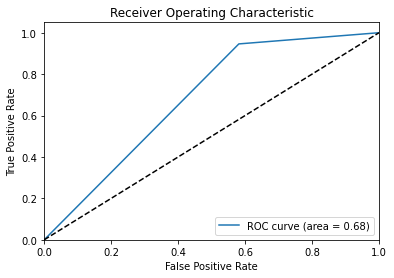


AUC score:  0.6822752985543683

 -------------------------------------------------------------

AdaBoostClassifier()
Acuraccy of training model : 0.8586956521739131
Accuracy of testing model : 0.7467532467532467
Classification report of test data :
                precision    recall  f1-score   support

           0       0.56      0.44      0.49        43
           1       0.80      0.86      0.83       111

    accuracy                           0.75       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.73      0.75      0.74       154

Confusion Matrix 
 [[19 24]
 [15 96]]


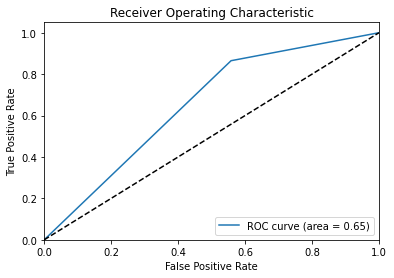


AUC score:  0.6533626649905719

 -------------------------------------------------------------

RandomForestClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.7662337662337663
Classification report of test data :
                precision    recall  f1-score   support

           0       0.61      0.47      0.53        43
           1       0.81      0.88      0.84       111

    accuracy                           0.77       154
   macro avg       0.71      0.67      0.69       154
weighted avg       0.75      0.77      0.76       154

Confusion Matrix 
 [[20 23]
 [13 98]]


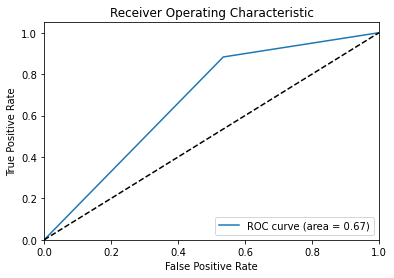


AUC score:  0.6739995809763252

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 1.0
Accuracy of testing model : 0.7532467532467533
Classification report of test data :
                precision    recal

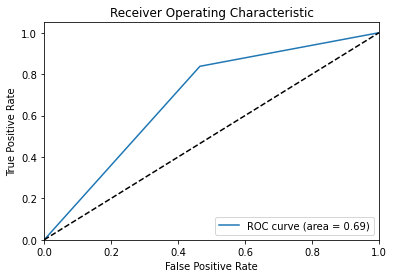


AUC score:  0.6863607793840353

 -------------------------------------------------------------



In [41]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train_rs,y_train_rs,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train_rs,y_train_rs,x_test,y_test)

#DecisionTree
dt= DecisionTreeClassifier()
model_selection(dt,x_train_rs,y_train_rs,x_test,y_test)

#SVC
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

#Decision Tree
ada = AdaBoostClassifier()
model_selection(ada,x_train_rs,y_train_rs,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train_rs,y_train_rs,x_test,y_test)

#XGBoost
xg = xgb.XGBClassifier()
model_selection(xg,x_train_rs,y_train_rs,x_test,y_test)


Selecting Logistic Regressoin and SVC for hyperparameter tunning as they have good accuracy for testing data and has less False Positives and False Negitives when compared to other models 

In [42]:
# Hyperparameter Tuning :
#Logistic Regression
parameters = {'penalty':['l1', 'l2', 'elasticnet'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

clf = GridSearchCV(lg,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print (clf.best_params_)
#SVC
parameters = {'kernel':['rbf', 'ploy', 'sigmoid'],
              'gamma':['auto','scale'],
              'max_iter': (30, 75, 100)
    }

clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print (clf.best_params_)

{'penalty': 'l1', 'solver': 'liblinear'}
{'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 100}


LogisticRegression(penalty='l1', solver='liblinear')
Acuraccy of training model : 0.8108695652173913
Accuracy of testing model : 0.8051948051948052
Classification report of test data :
                precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.81      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.80      0.69      0.71       154
weighted avg       0.80      0.81      0.78       154

Confusion Matrix 
 [[ 18  25]
 [  5 106]]


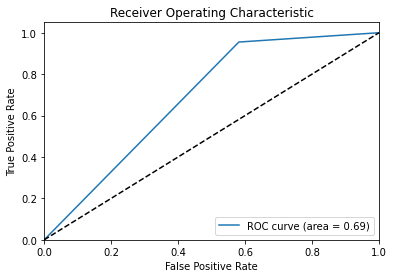


AUC score:  0.6867798030588728

 -------------------------------------------------------------

SVC(max_iter=100)
Acuraccy of training model : 0.8434782608695652
Accuracy of testing model : 0.7987012987012987
Classification report of test data :
                precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.81      0.94      0.87       111

    accuracy                           0.80       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.79      0.80      0.78       154

Confusion Matrix 
 [[ 19  24]
 [  7 104]]


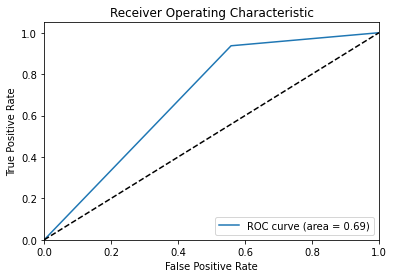


AUC score:  0.689398701026608

 -------------------------------------------------------------



In [43]:

lg1 = LogisticRegression(penalty='l1', solver= 'liblinear')
model_selection(lg1,x_train_rs,y_train_rs,x_test,y_test)

svc1 = SVC(gamma='scale', kernel='rbf', max_iter=100)
model_selection(svc1,x_train_rs,y_train_rs,x_test,y_test)

Selecting Logistic Regression for prediction as it has 
1. The best testing accuracy 
2. Less number of False Postives and False Negitves

In [44]:
# Saving Model
import pickle
filename= 'Loan_pred.pkl'
pickle.dump(lg,open(filename, 'wb'))

In [45]:
#Prediction
a= np.array(y_test)
predicted=np.array (lg.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
149,1,0
150,0,0
151,1,1
152,1,1


In [46]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (lg.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,Y,Y
1,Y,Y
2,Y,N
3,Y,Y
4,Y,Y
...,...,...
149,Y,N
150,N,N
151,Y,Y
152,Y,Y
